# **ICA**

imagen.png

In [82]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# Modeling

from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Evaluation

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**DataSet**

In [84]:
data = pd.read_csv('/content/drive/MyDrive/data_CA/master_v_mplus_short.csv')

In [85]:
data.head()

estacion       fecha   año  dia_año  mes  dia_mes dia_tipo  prec  tmed  \
0  BARAJAS  2017-01-01  2017        1    1        1   No_LAB   0.0   0.2   
1  BARAJAS  2017-01-02  2017        2    1        2      LAB   0.0   2.8   
2  BARAJAS  2017-01-03  2017        3    1        3      LAB   0.0   5.5   
3  BARAJAS  2017-01-04  2017        4    1        4      LAB   0.0   5.2   
4  BARAJAS  2017-01-05  2017        5    1        5      LAB   0.0   5.3   

   hrmed  ...  presmed  dioxido_nitrogeno  monoxido_nitrogeno  \
0   84.0  ...   957.80               45.0                27.0   
1   86.0  ...   954.30               52.0                37.0   
2   79.0  ...   956.65               64.0                81.0   
3   86.0  ...   958.20               67.0                87.0   
4   92.0  ...   956.95               63.0                59.0   

   oxido_nitrogeno  ozono    pm25    pm10  intensidad ocupacion      carga  
0             86.0   11.0  NoInfo  NoInfo  156.769704  4.503079  15.968596  
1            109.0   13.0  NoInfo  NoInfo  226.734193  6.647023  23.390424  
2            189.0    6.0  NoInfo  NoInfo  238.387793  7.379162  24.723798  
3            200.0    4.0  NoInfo  NoInfo  238.496010  8.069368  25.219767  
4            153.0    6.0  NoInfo  NoInfo  234.923786  7.814997  24.885065  

[5 rows x 22 columns]

In [86]:
data.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'prec', 'tmed', 'hrmed', 'velmed', 'dir', 'presmed',
       'dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'ozono',
       'pm25', 'pm10', 'intensidad', 'ocupacion', 'carga'],
      dtype='object')

<Axes: xlabel='dioxido_nitrogeno', ylabel='Count'>

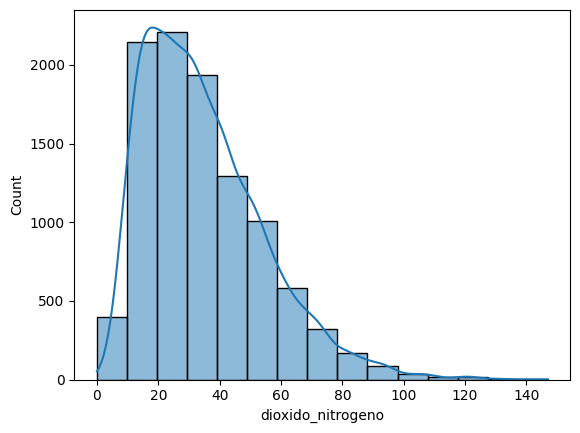

In [87]:
sns.histplot(data, x=data.dioxido_nitrogeno, bins = 15, kde=True)

In [88]:
y = np.cbrt(data.dioxido_nitrogeno)

<Axes: xlabel='dioxido_nitrogeno', ylabel='Count'>

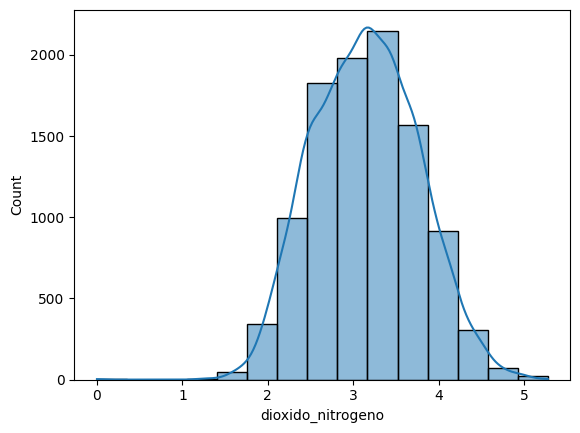

In [89]:
 sns.histplot(y, bins = 15, kde=True)

In [90]:
data.drop(columns=['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dioxido_nitrogeno',
                       'intensidad', 'ocupacion', 'ozono', 'pm25', 'pm10',], inplace=True)
X = data

In [91]:
X.head()

dia_tipo  prec  tmed  hrmed  velmed   dir  presmed  monoxido_nitrogeno  \
0   No_LAB   0.0   0.2   84.0     1.7  99.0   957.80                27.0   
1      LAB   0.0   2.8   86.0     1.7  99.0   954.30                37.0   
2      LAB   0.0   5.5   79.0     0.8  20.0   956.65                81.0   
3      LAB   0.0   5.2   86.0     1.9  22.0   958.20                87.0   
4      LAB   0.0   5.3   92.0     1.7  26.0   956.95                59.0   

   oxido_nitrogeno      carga  
0             86.0  15.968596  
1            109.0  23.390424  
2            189.0  24.723798  
3            200.0  25.219767  
4            153.0  24.885065

In [92]:
y.head()

0    3.556893
1    3.732511
2    4.000000
3    4.061548
4    3.979057
Name: dioxido_nitrogeno, dtype: float64

#**EDA and Preprocessing**

In [93]:
X.describe(include='all').T # Features

count unique  top  freq        mean        std  \
dia_tipo              10224      2  LAB  6948         NaN        NaN   
prec                10224.0    NaN  NaN   NaN    1.138487   4.182197   
tmed                10224.0    NaN  NaN   NaN   16.024554   7.825588   
hrmed               10224.0    NaN  NaN   NaN   54.274045  19.188356   
velmed              10224.0    NaN  NaN   NaN    2.475141   1.493608   
dir                 10224.0    NaN  NaN   NaN   27.620755  26.840118   
presmed             10224.0    NaN  NaN   NaN  942.723289    7.17015   
monoxido_nitrogeno  10224.0    NaN  NaN   NaN   17.046808  24.875396   
oxido_nitrogeno     10224.0    NaN  NaN   NaN   60.927321  55.647935   
carga               10224.0    NaN  NaN   NaN   18.833822   5.412244   

                         min        25%        50%        75%       max  
dia_tipo                 NaN        NaN        NaN        NaN       NaN  
prec                     0.0        0.0        0.0        0.0      91.2  
tmed                    -6.2        9.5       15.1       22.4      34.4  
hrmed                   15.0       38.0       52.0      68.05     100.0  
velmed                   0.0        1.4        2.2        3.1      12.2  
dir                      1.0       12.0       22.0       27.0      99.0  
presmed                912.1      938.0     941.75      947.7    967.65  
monoxido_nitrogeno       0.0        3.0        8.0       20.0     254.0  
oxido_nitrogeno          0.0       25.0       43.0       77.0     519.0  
carga               1.437926  15.178395  18.657494  22.902749  37.41723

In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10224 entries, 0 to 10223
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dia_tipo            10224 non-null  object 
 1   prec                10224 non-null  float64
 2   tmed                10224 non-null  float64
 3   hrmed               10224 non-null  float64
 4   velmed              10224 non-null  float64
 5   dir                 10224 non-null  float64
 6   presmed             10224 non-null  float64
 7   monoxido_nitrogeno  10224 non-null  float64
 8   oxido_nitrogeno     10224 non-null  float64
 9   carga               10224 non-null  float64
dtypes: float64(9), object(1)
memory usage: 798.9+ KB


In [95]:
X.isnull().sum().sum()

0

Variales sin valores nulos (nulls).

In [96]:
X.columns

Index(['dia_tipo', 'prec', 'tmed', 'hrmed', 'velmed', 'dir', 'presmed',
       'monoxido_nitrogeno', 'oxido_nitrogeno', 'carga'],
      dtype='object')

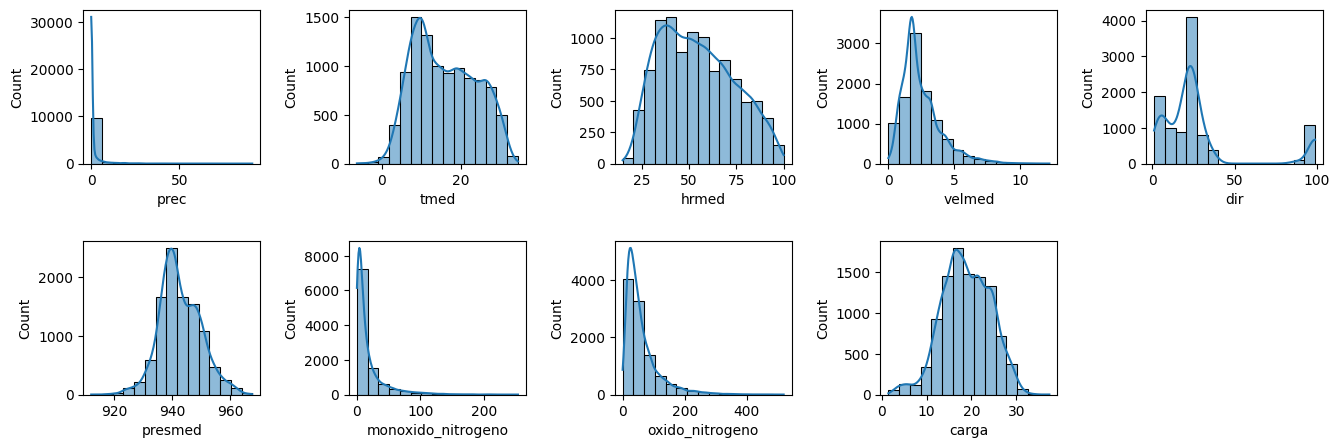

In [97]:
continuous_v = ['prec', 'tmed', 'hrmed', 'velmed', 'dir',
       'presmed', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'carga']

plt.figure(1 , figsize = (16 , 8))
n = 0
for v in continuous_v:
    n += 1
    plt.subplot(3, 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(X, x=X[v], bins = 15, kde=True)
plt.show()

In [98]:
plt.figure(1 , figsize = (16 , 8))
n = 0
for v in continuous_v:
    n += 1
    plt.subplot(3, 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(X, x=X[v])
plt.show()

Variables no normales con outliers y diferencias en las escalas -> RobustScaler (robust to outliers) paara transformar features.

In [99]:
# Scaling dia_tipo
X.dia_tipo = pd.DataFrame(LabelEncoder().fit_transform(X.dia_tipo), columns=['dia_tipo'])
X.head()

dia_tipo  prec  tmed  hrmed  velmed   dir  presmed  monoxido_nitrogeno  \
0         1   0.0   0.2   84.0     1.7  99.0   957.80                27.0   
1         0   0.0   2.8   86.0     1.7  99.0   954.30                37.0   
2         0   0.0   5.5   79.0     0.8  20.0   956.65                81.0   
3         0   0.0   5.2   86.0     1.9  22.0   958.20                87.0   
4         0   0.0   5.3   92.0     1.7  26.0   956.95                59.0   

   oxido_nitrogeno      carga  
0             86.0  15.968596  
1            109.0  23.390424  
2            189.0  24.723798  
3            200.0  25.219767  
4            153.0  24.885065

In [100]:
# Split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [101]:
# Scaling

num_pipeline = Pipeline(steps=[('rs', RobustScaler())])

pre = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, continuous_v)
    ]
    , remainder='passthrough'
    , sparse_threshold=0
    , verbose_feature_names_out=False
)

x_train_p = pd.DataFrame(data=pre.fit_transform(x_train),
                         columns=pre.get_feature_names_out())


x_test_p = pd.DataFrame(data=pre.transform(x_test)
    , columns=pre.get_feature_names_out())


In [102]:
x_train_p.head()

prec      tmed     hrmed    velmed       dir   presmed  monoxido_nitrogeno  \
0   0.0  0.515385 -0.741935  1.000000  0.133333  1.000000              0.0625   
1   0.0  0.776923 -0.548387 -0.176471  5.133333  1.112821             -0.3125   
2   0.0 -0.430769  0.967742  0.529412  0.200000  0.210256              0.4375   
3   0.0  0.615385 -0.741935 -0.294118  0.066667 -0.317949              0.5000   
4   0.0 -0.307692  0.483871  0.000000 -0.066667  0.358974              2.1250   

   oxido_nitrogeno     carga  dia_tipo  
0        -0.019608  0.307412       0.0  
1        -0.176471  0.522224       0.0  
2         0.392157  0.593967       0.0  
3         0.509804  0.358883       0.0  
4         1.470588 -0.474648       0.0

In [103]:
x_test_p.head()

prec      tmed     hrmed    velmed       dir   presmed  monoxido_nitrogeno  \
0   0.0  1.169231 -0.677419 -0.294118  0.133333 -0.143590              0.0000   
1   0.0 -0.123077  0.129032 -0.176471 -0.133333  1.446154              0.2500   
2   0.0  0.584615  0.000000  1.000000  5.133333 -0.830769             -0.1875   
3   0.0  1.153846 -0.645161 -0.176471 -1.133333 -0.400000             -0.0625   
4   0.0 -0.646154  0.451613 -1.117647 -1.000000  1.153846              4.5000   

   oxido_nitrogeno     carga  dia_tipo  
0         0.156863 -0.166154       0.0  
1         0.470588  0.938906       0.0  
2        -0.215686 -0.410102       0.0  
3        -0.019608  0.361215       0.0  
4         2.627451 -0.003684       0.0

In [104]:
y_train.head()

1982    3.036589
975     3.107233
9191    3.448217
4863    3.556893
6996    3.779763
Name: dioxido_nitrogeno, dtype: float64

In [105]:
y_test.head()

4944    3.419952
471     3.659306
7473    2.924018
3485    3.174802
8762    3.779763
Name: dioxido_nitrogeno, dtype: float64

#**Models Training**

#***Linear Regression***

In [106]:
lr = LinearRegression()
lr.fit(x_train_p, y_train)
y_train_pred = lr.predict(x_train_p)
y_test_pred = lr.predict(x_test_p)

In [107]:
m_train = [r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_train, y_train_pred, squared=False),
           mean_absolute_error(y_train, y_train_pred)]

m_test = [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_pred, squared=False),
          mean_absolute_error(y_test, y_test_pred)]

mtcs = pd.DataFrame(
    data = [m_train, m_test]
    , columns = ['r2 score', 'mse', 'rmse', 'mae']
    , index = ['train', 'test']
)

In [108]:
mtcs

r2 score       mse      rmse       mae
train  0.961184  0.014421  0.120089  0.085171
test   0.956691  0.017378  0.131827  0.092186

In [109]:
# For evaluation
metrics = pd.DataFrame(columns=['Algorithm', 'R2-score_train', 'MSE_train',
                                'RMSE_train', 'MAE_train', 'R2-score_test',
                                'MSE_test', 'RMSE_test', 'MAE_test'])
metrics['Algorithm'] = ['Linear Regression', 'Decision Trees R', 'SVMs R', 'Random Forest R', 'ADABoost R', 'XGBoost R' ]

metrics.loc[0,'R2-score_train']=mtcs.loc['train','r2 score']
metrics.loc[0,'MSE_train']=mtcs.loc['train','mse']
metrics.loc[0,'RMSE_train']=mtcs.loc['train','rmse']
metrics.loc[0, 'MAE_train']=mtcs.loc['train','mae']


metrics.loc[0,'R2-score_test']=mtcs.loc['test','r2 score']
metrics.loc[0,'MSE_test']=mtcs.loc['test','mse']
metrics.loc[0,'RMSE_test']=mtcs.loc['test','rmse']
metrics.loc[0, 'MAE_test']=mtcs.loc['test','mae']


In [110]:
metrics

Algorithm R2-score_train MSE_train RMSE_train MAE_train  \
0  Linear Regression       0.961184  0.014421   0.120089  0.085171   
1   Decision Trees R            NaN       NaN        NaN       NaN   
2             SVMs R            NaN       NaN        NaN       NaN   
3    Random Forest R            NaN       NaN        NaN       NaN   
4         ADABoost R            NaN       NaN        NaN       NaN   
5          XGBoost R            NaN       NaN        NaN       NaN   

  R2-score_test  MSE_test RMSE_test  MAE_test  
0      0.956691  0.017378  0.131827  0.092186  
1           NaN       NaN       NaN       NaN  
2           NaN       NaN       NaN       NaN  
3           NaN       NaN       NaN       NaN  
4           NaN       NaN       NaN       NaN  
5           NaN       NaN       NaN       NaN

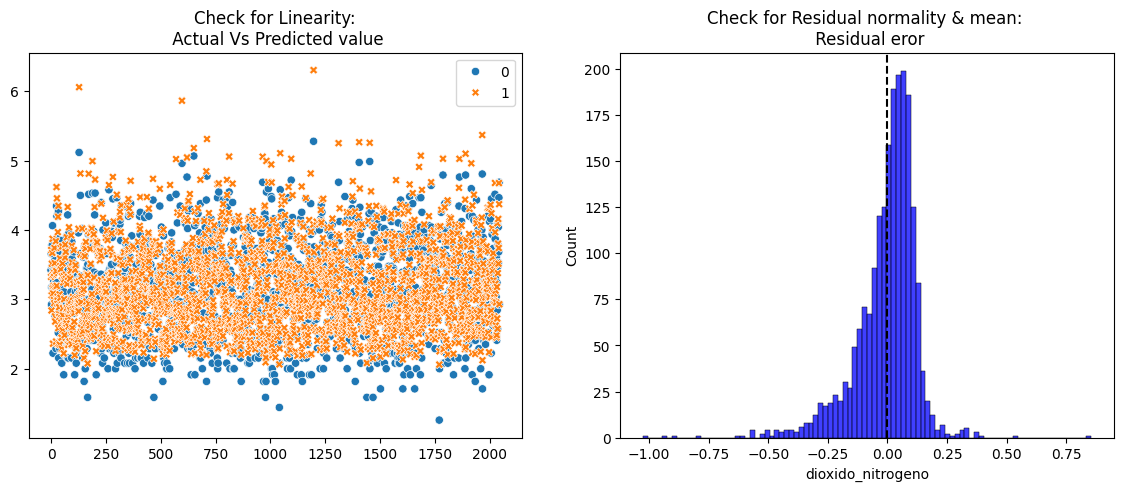

In [111]:
# Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_test_pred), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_test_pred), ax=ax, color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');



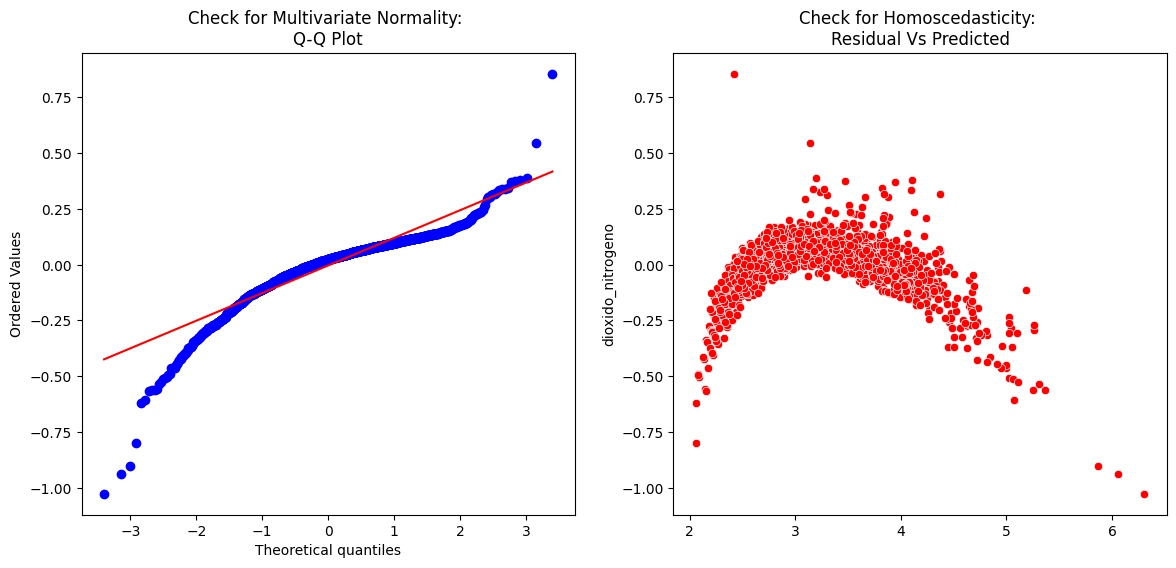

In [112]:
# Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [113]:
# Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_test_pred))
VIF

23.090098507848616

In [114]:
# Features importance
from sklearn.inspection import permutation_importance

model = lr.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)

Text(0.5, 1.01, 'Permutation Importances Test')

#***Lasso (L1 regularization)***

In [115]:
m_lasso = Lasso(random_state=8)
m_lasso.fit(x_train_p, y_train)

y_train_pred = m_lasso.predict(x_train_p)
y_test_pred = m_lasso.predict(x_test_p)

In [116]:
m_train = [r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_train, y_train_pred, squared=False),
           mean_absolute_error(y_train, y_train_pred)]

m_test = [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_pred, squared=False),
          mean_absolute_error(y_test, y_test_pred)]

pd.DataFrame(
    data = [m_train, m_test]
    , columns = ['r2 score', 'mse', 'rmse', 'mae']
    , index = ['train', 'test']
)

r2 score       mse      rmse       mae
train  0.000000  0.371537  0.609539  0.496644
test  -0.000351  0.401410  0.633570  0.517493

In [117]:
# Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_test_pred), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_test_pred), ax=ax, color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

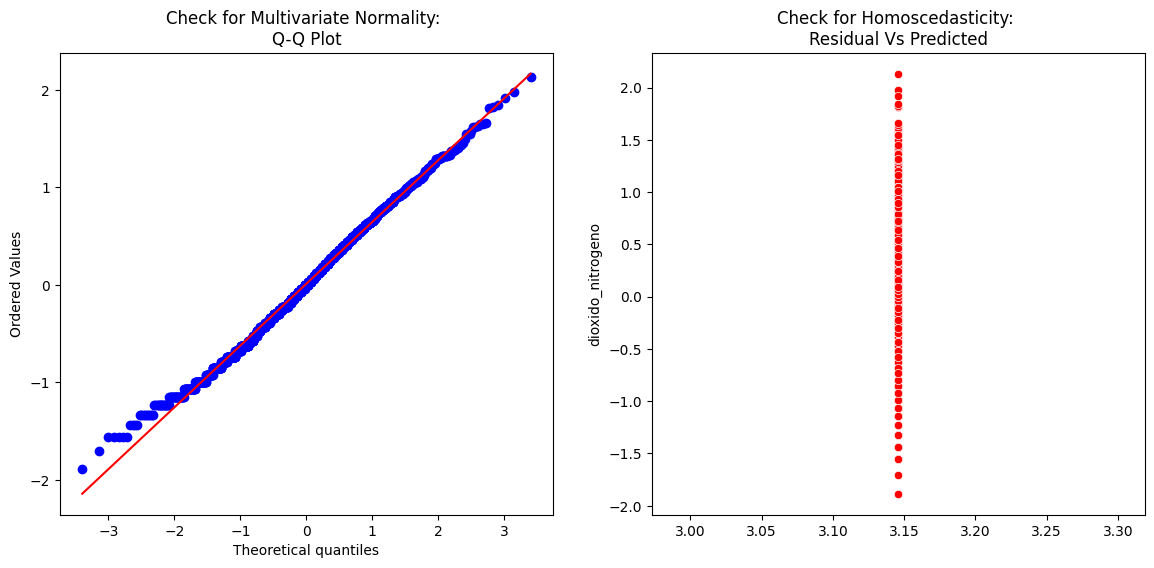

In [118]:
# Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [119]:
# Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_test_pred))
VIF

0.9996493616574028

Text(0.5, 1.01, 'Permutation Importances Test')

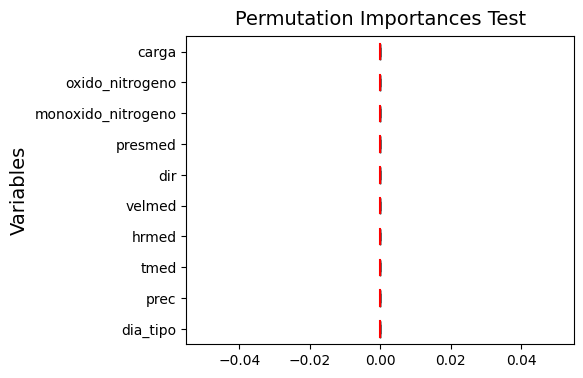

In [120]:
from sklearn.inspection import permutation_importance

model = m_lasso.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)

#***Ridge (L2 regularization)***

In [121]:
m_ridge = Ridge(random_state=8)
m_ridge.fit(x_train_p, y_train)

y_train_pred = m_ridge.predict(x_train_p)
y_test_pred = m_ridge.predict(x_test_p)

In [122]:
m_train = [r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_train, y_train_pred, squared=False),
           mean_absolute_error(y_train, y_train_pred)]

m_test = [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_pred, squared=False),
          mean_absolute_error(y_test, y_test_pred)]

pd.DataFrame(
    data = [m_train, m_test]
    , columns = ['r2 score', 'mse', 'rmse', 'mae']
    , index = ['train', 'test']
)

r2 score       mse      rmse       mae
train  0.961178  0.014424  0.120099  0.085247
test   0.956783  0.017342  0.131687  0.092191

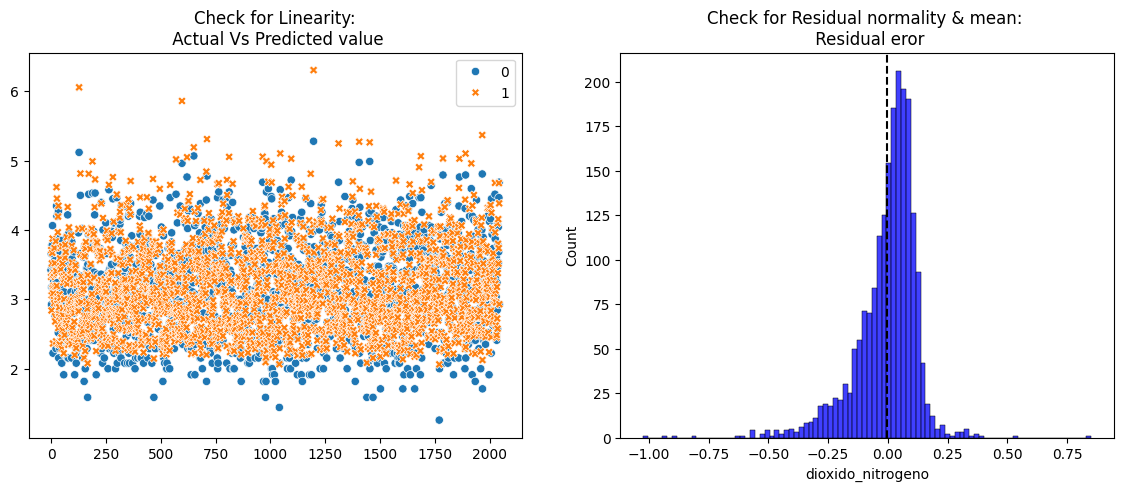

In [123]:
# Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_test_pred), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_test_pred), ax=ax, color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

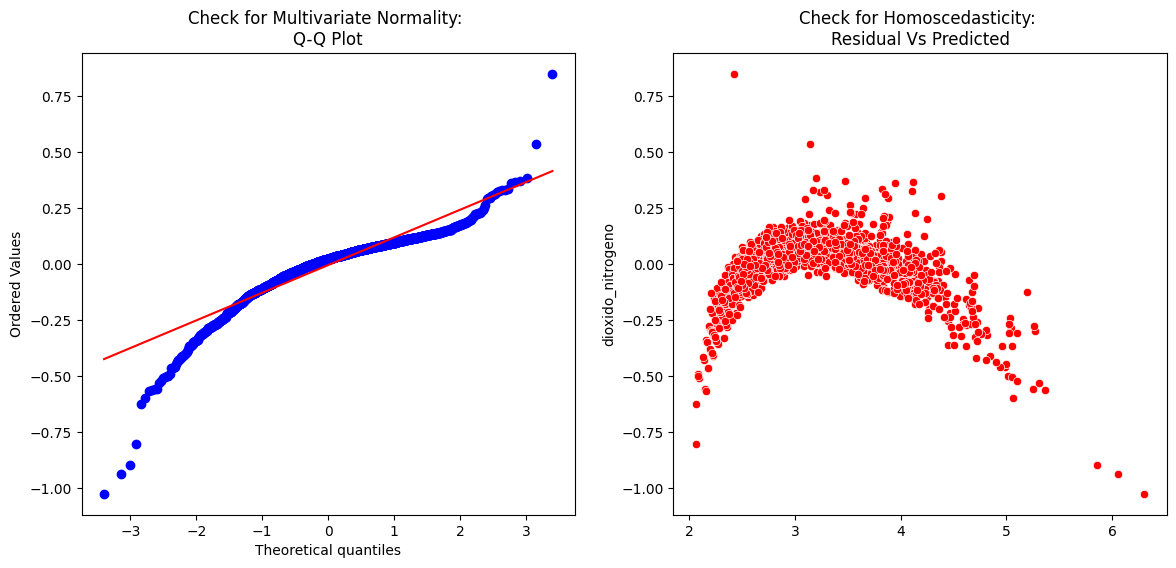

In [124]:
# Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [125]:
# Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_test_pred))
VIF

23.139167360149443

Text(0.5, 1.01, 'Permutation Importances Test')

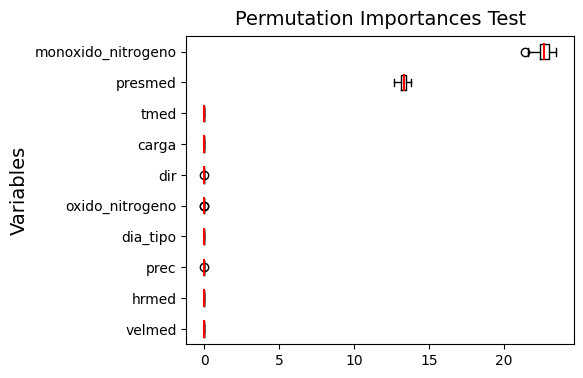

In [126]:
from sklearn.inspection import permutation_importance

model = m_ridge.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)

#***Elasticnet (L1 y L2)***

In [127]:
m_elast = ElasticNet(random_state=8)
m_elast.fit(x_train_p, y_train)

y_train_pred = m_elast.predict(x_train_p)
y_test_pred = m_ridge.predict(x_test_p)

In [128]:
m_train = [r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_train, y_train_pred, squared=False),
           mean_absolute_error(y_train, y_train_pred)]

m_test = [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_pred, squared=False),
          mean_absolute_error(y_test, y_test_pred)]

pd.DataFrame(
    data = [m_train, m_test]
    , columns = ['r2 score', 'mse', 'rmse', 'mae']
    , index = ['train', 'test']
)

r2 score       mse      rmse       mae
train  0.216121  0.291240  0.539667  0.445574
test   0.956783  0.017342  0.131687  0.092191

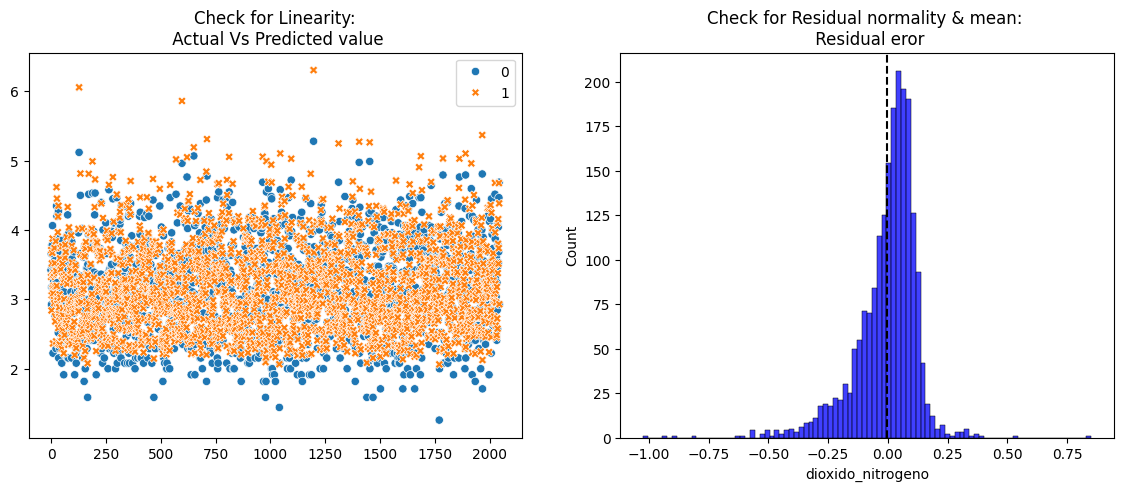

In [129]:
# Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_test_pred), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_test_pred), ax=ax, color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

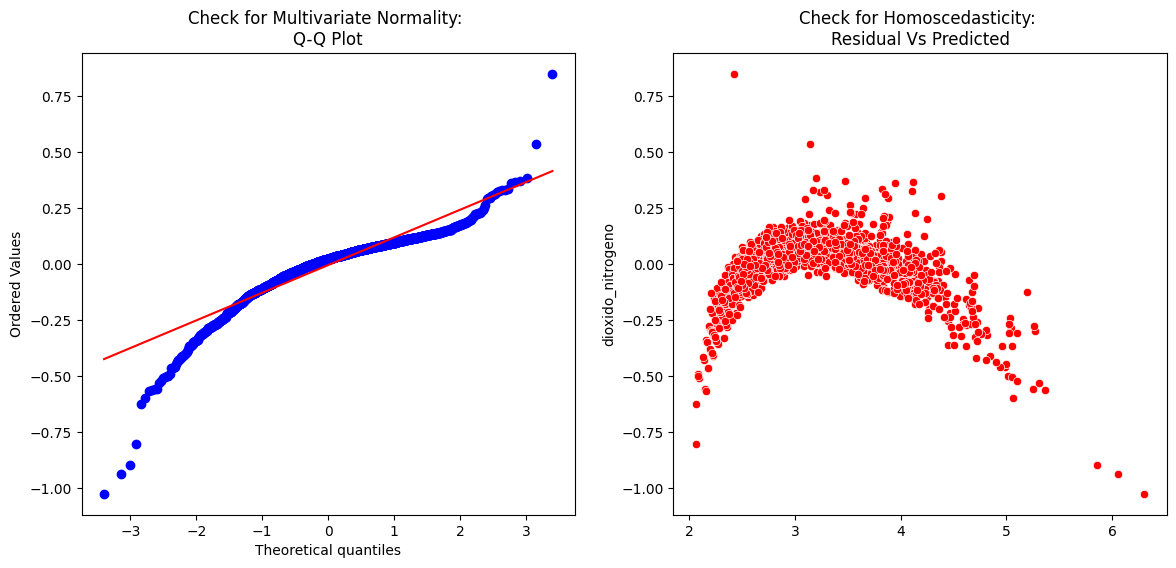

In [130]:
# Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [131]:
# Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_test_pred))
VIF

23.139167360149443

Text(0.5, 1.01, 'Permutation Importances Test')

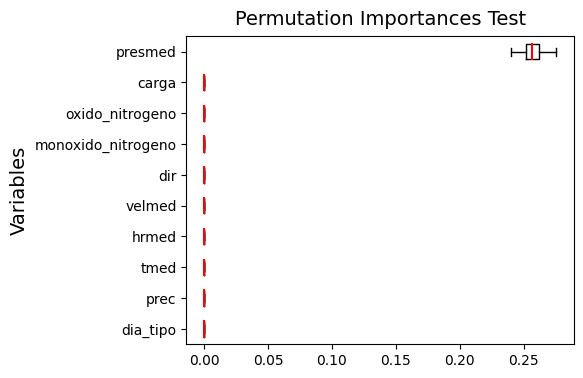

In [132]:
from sklearn.inspection import permutation_importance

model = m_elast.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)

#***Decision Trees Regression***

In [133]:
m_dtr = DecisionTreeRegressor()
m_dtr.fit(x_train_p, y_train)

y_train_pred = m_dtr.predict(x_train_p)
y_test_pred = m_dtr.predict(x_test_p)

In [134]:
m_train = [r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_train, y_train_pred, squared=False),
           mean_absolute_error(y_train, y_train_pred)]

m_test = [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_pred, squared=False),
          mean_absolute_error(y_test, y_test_pred)]

mtcs = pd.DataFrame(
    data = [m_train, m_test]
    , columns = ['r2 score', 'mse', 'rmse', 'mae']
    , index = ['train', 'test']
)

In [135]:
# For evaluation

metrics.loc[1,'R2-score_train']=mtcs.loc['train','r2 score']
metrics.loc[1,'MSE_train']=mtcs.loc['train','mse']
metrics.loc[1,'RMSE_train']=mtcs.loc['train','rmse']
metrics.loc[1, 'MAE_train']=mtcs.loc['train','mae']


metrics.loc[1,'R2-score_test']=mtcs.loc['test','r2 score']
metrics.loc[1,'MSE_test']=mtcs.loc['test','mse']
metrics.loc[1,'RMSE_test']=mtcs.loc['test','rmse']
metrics.loc[1, 'MAE_test']=mtcs.loc['test','mae']

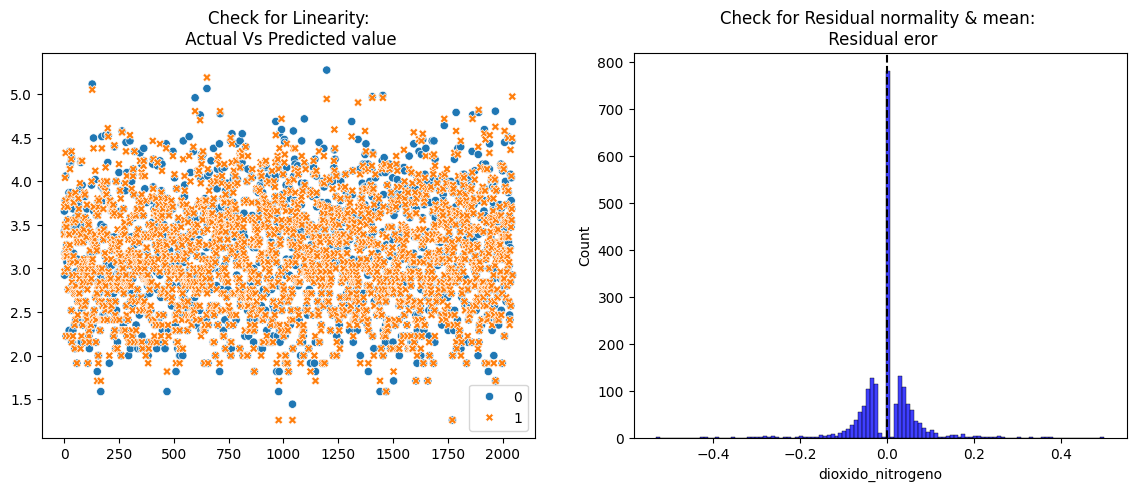

In [136]:
# Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_test_pred), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_test_pred), ax=ax, color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

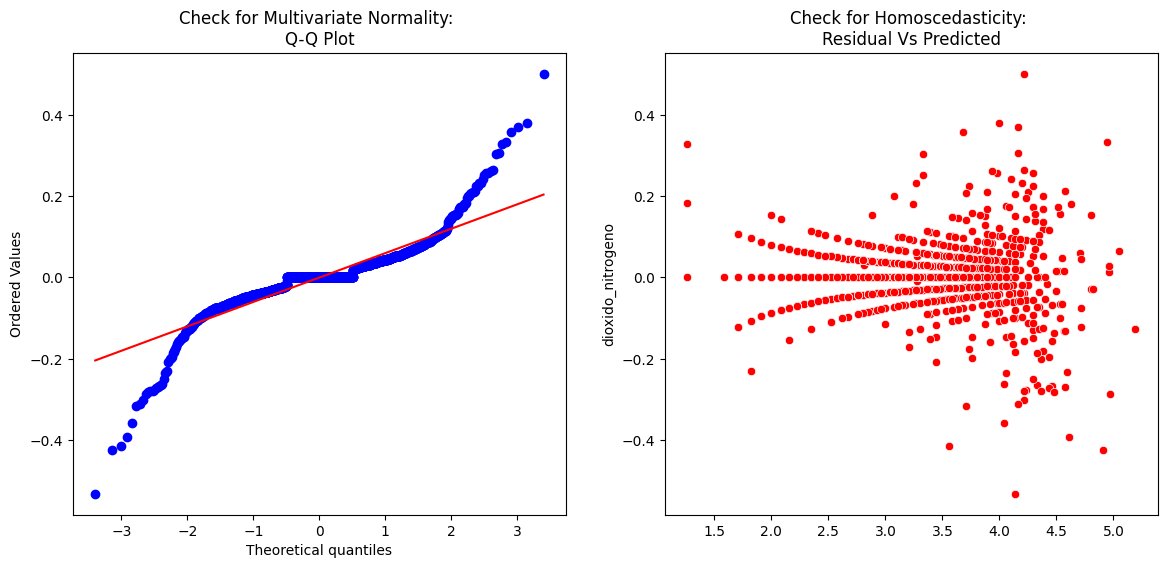

In [137]:
# Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [138]:
# Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_test_pred))
VIF

92.71940132021003

Text(0.5, 1.01, 'Permutation Importances Test')

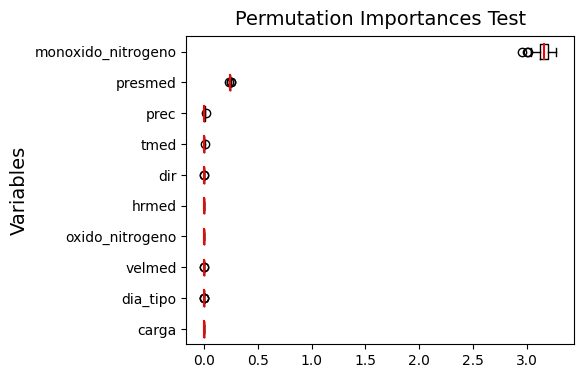

In [139]:
from sklearn.inspection import permutation_importance

model = m_dtr.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)

#***SVMs Regression***

In [140]:
m_svr = SVR()
m_svr.fit(x_train_p, y_train)

y_train_pred = m_svr.predict(x_train_p)
y_test_pred = m_svr.predict(x_test_p)

In [141]:
m_train = [r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_train, y_train_pred, squared=False),
           mean_absolute_error(y_train, y_train_pred)]

m_test = [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_pred, squared=False),
          mean_absolute_error(y_test, y_test_pred)]

mtcs = pd.DataFrame(
    data = [m_train, m_test]
    , columns = ['r2 score', 'mse', 'rmse', 'mae']
    , index = ['train', 'test']
)

In [142]:
# For evaluation

metrics.loc[2,'R2-score_train']=mtcs.loc['train','r2 score']
metrics.loc[2,'MSE_train']=mtcs.loc['train','mse']
metrics.loc[2,'RMSE_train']=mtcs.loc['train','rmse']
metrics.loc[2, 'MAE_train']=mtcs.loc['train','mae']


metrics.loc[2,'R2-score_test']=mtcs.loc['test','r2 score']
metrics.loc[2,'MSE_test']=mtcs.loc['test','mse']
metrics.loc[2,'RMSE_test']=mtcs.loc['test','rmse']
metrics.loc[2, 'MAE_test']=mtcs.loc['test','mae']

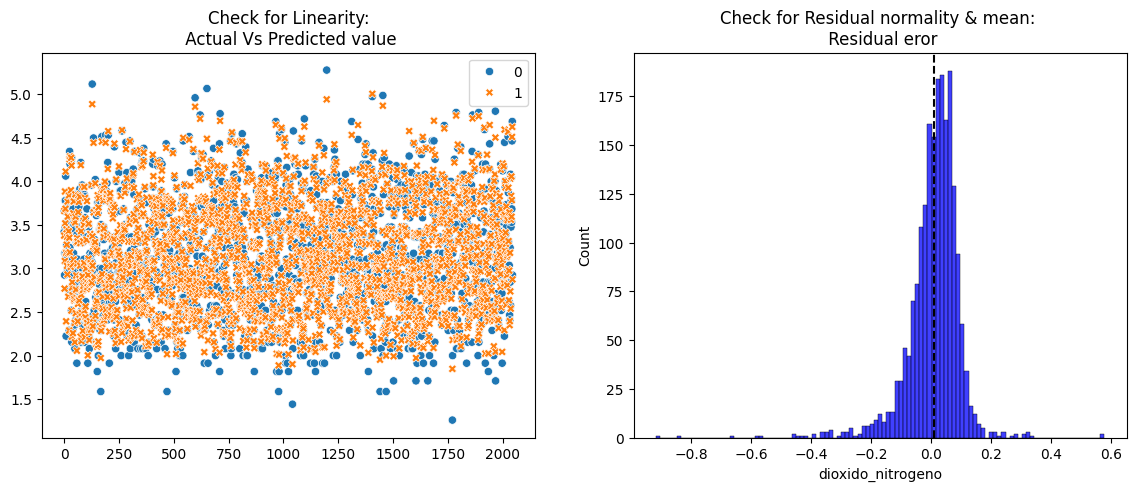

In [143]:
# Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_test_pred), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_test_pred), ax=ax, color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

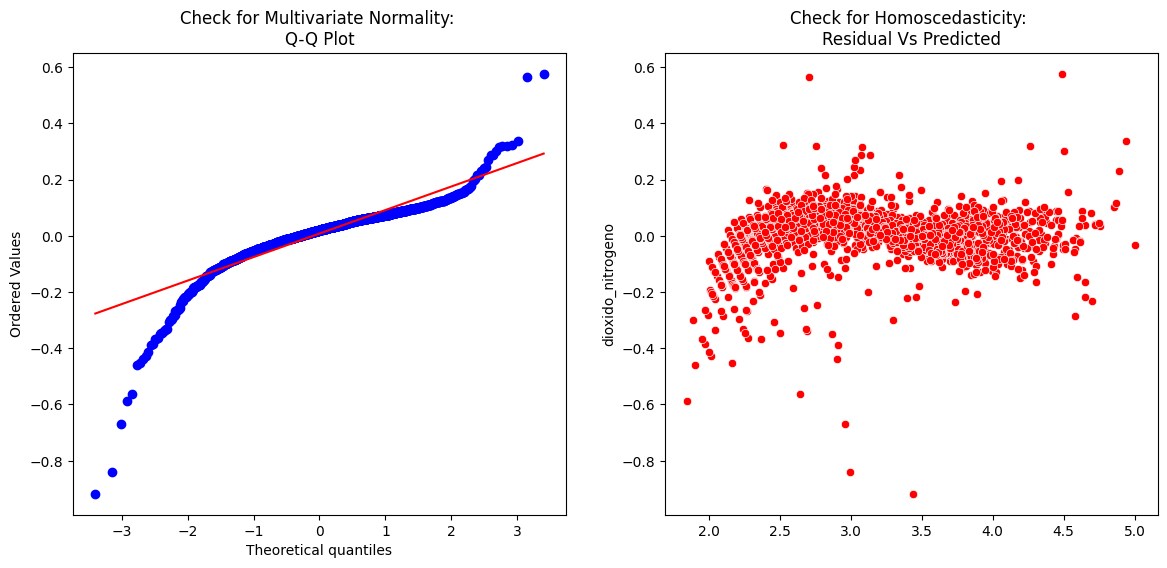

In [144]:
# Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [145]:
# Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_test_pred))
VIF

47.72982927691941

Text(0.5, 1.01, 'Permutation Importances Test')

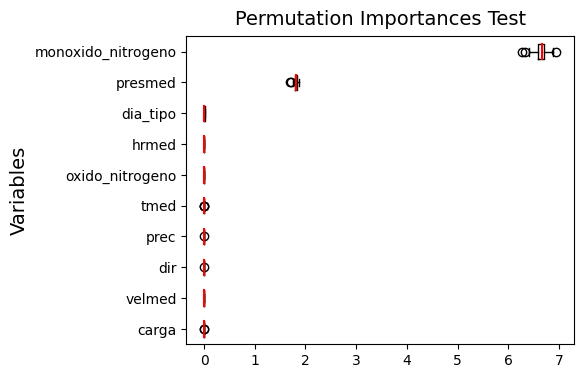

In [146]:
from sklearn.inspection import permutation_importance

model = m_svr.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)

#***Random Forest Regression***

In [147]:
m_rfr = RandomForestRegressor()
m_rfr.fit(x_train_p, y_train)

y_train_pred = m_rfr.predict(x_train_p)
y_test_pred = m_rfr.predict(x_test_p)

In [148]:
m_train = [r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_train, y_train_pred, squared=False),
           mean_absolute_error(y_train, y_train_pred)]

m_test = [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_pred, squared=False),
          mean_absolute_error(y_test, y_test_pred)]

mtcs = pd.DataFrame(
    data = [m_train, m_test]
    , columns = ['r2 score', 'mse', 'rmse', 'mae']
    , index = ['train', 'test']
)

In [149]:
# For evaluation

metrics.loc[3,'R2-score_train']=mtcs.loc['train','r2 score']
metrics.loc[3,'MSE_train']=mtcs.loc['train','mse']
metrics.loc[3,'RMSE_train']=mtcs.loc['train','rmse']
metrics.loc[3, 'MAE_train']=mtcs.loc['train','mae']


metrics.loc[3,'R2-score_test']=mtcs.loc['test','r2 score']
metrics.loc[3,'MSE_test']=mtcs.loc['test','mse']
metrics.loc[3,'RMSE_test']=mtcs.loc['test','rmse']
metrics.loc[3, 'MAE_test']=mtcs.loc['test','mae']

In [150]:
# Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_test_pred), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_test_pred), ax=ax, color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [151]:
# Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [152]:
# Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_test_pred))
VIF

167.98520676464895

In [153]:
from sklearn.inspection import permutation_importance

model = m_rfr.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)

Text(0.5, 1.01, 'Permutation Importances Test')

#***ADABoost Regression***

In [154]:
m_ada = AdaBoostRegressor()
m_ada.fit(x_train_p, y_train)

y_train_pred = m_ada.predict(x_train_p)
y_test_pred = m_ada.predict(x_test_p)

In [155]:
m_train = [r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_train, y_train_pred, squared=False),
           mean_absolute_error(y_train, y_train_pred)]

m_test = [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_pred, squared=False),
          mean_absolute_error(y_test, y_test_pred)]

mtcs = pd.DataFrame(
    data = [m_train, m_test]
    , columns = ['r2 score', 'mse', 'rmse', 'mae']
    , index = ['train', 'test']
)

In [156]:
# For evaluation

metrics.loc[4,'R2-score_train']=mtcs.loc['train','r2 score']
metrics.loc[4,'MSE_train']=mtcs.loc['train','mse']
metrics.loc[4,'RMSE_train']=mtcs.loc['train','rmse']
metrics.loc[4, 'MAE_train']=mtcs.loc['train','mae']


metrics.loc[4,'R2-score_test']=mtcs.loc['test','r2 score']
metrics.loc[4,'MSE_test']=mtcs.loc['test','mse']
metrics.loc[4,'RMSE_test']=mtcs.loc['test','rmse']
metrics.loc[4, 'MAE_test']=mtcs.loc['test','mae']


In [157]:
# Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_test_pred), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_test_pred), ax=ax, color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [158]:
# Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [159]:
# Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_test_pred))
VIF

20.47734277262847

Text(0.5, 1.01, 'Permutation Importances Test')

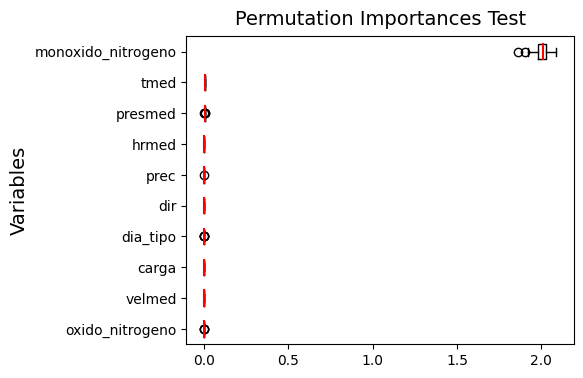

In [160]:
from sklearn.inspection import permutation_importance

model = m_ada.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)

#***XGBoost Regression***

In [161]:
m_xgb = XGBRegressor()
m_xgb.fit(x_train_p, y_train)

y_train_pred = m_ada.predict(x_train_p)
y_test_pred = m_ada.predict(x_test_p)

In [162]:
m_train = [r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_train, y_train_pred, squared=False),
           mean_absolute_error(y_train, y_train_pred)]

m_test = [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_pred, squared=False),
          mean_absolute_error(y_test, y_test_pred)]

mtcs = pd.DataFrame(
    data = [m_train, m_test]
    , columns = ['r2 score', 'mse', 'rmse', 'mae']
    , index = ['train', 'test']
)

In [163]:
# For evaluation

metrics.loc[5,'R2-score_train']=mtcs.loc['train','r2 score']
metrics.loc[5,'MSE_train']=mtcs.loc['train','mse']
metrics.loc[5,'RMSE_train']=mtcs.loc['train','rmse']
metrics.loc[5, 'MAE_train']=mtcs.loc['train','mae']


metrics.loc[5,'R2-score_test']=mtcs.loc['test','r2 score']
metrics.loc[5,'MSE_test']=mtcs.loc['test','mse']
metrics.loc[5,'RMSE_test']=mtcs.loc['test','rmse']
metrics.loc[5, 'MAE_test']=mtcs.loc['test','mae']

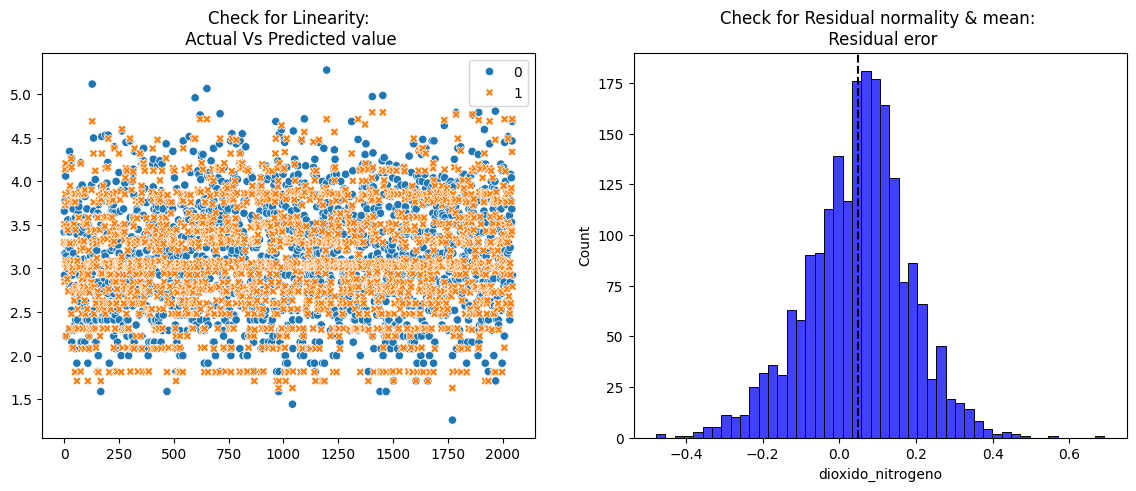

In [164]:
# Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_test_pred), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_test_pred), ax=ax, color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

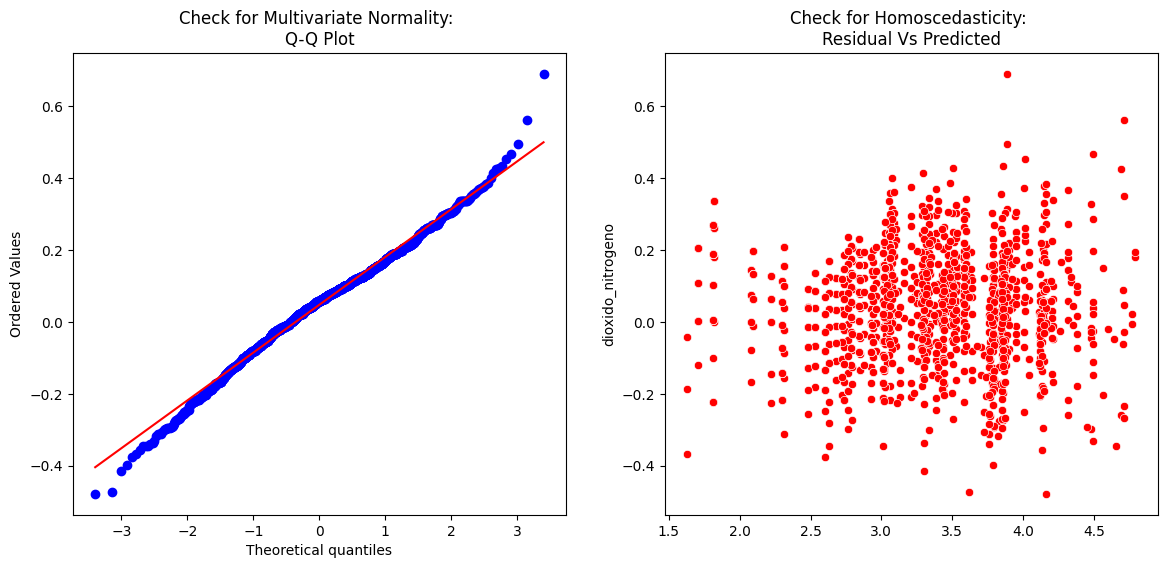

In [165]:
# Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [166]:
# Multicollinearity
# Variance Inflation Factor
VIF = 1/(1- r2_score(y_test, y_test_pred))
VIF

19.958815119608385

Text(0.5, 1.01, 'Permutation Importances Test')

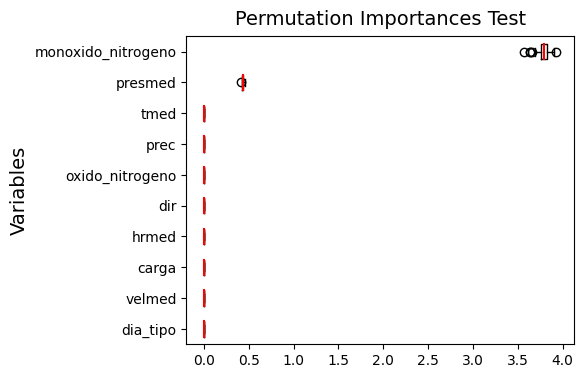

In [167]:
from sklearn.inspection import permutation_importance

model = m_xgb.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)

#**Models Evaluation**

***Metrics by Model***

In [168]:
metrics

Algorithm R2-score_train MSE_train RMSE_train MAE_train  \
0  Linear Regression       0.961184  0.014421   0.120089  0.085171   
1   Decision Trees R            1.0       0.0        0.0       0.0   
2             SVMs R       0.981949  0.006707   0.081895  0.056642   
3    Random Forest R       0.999271  0.000271   0.016457  0.010218   
4         ADABoost R       0.950466  0.018404    0.13566  0.110014   
5          XGBoost R       0.948482  0.019141    0.13835  0.111965   

  R2-score_test  MSE_test RMSE_test  MAE_test  
0      0.956691  0.017378  0.131827  0.092186  
1      0.989215  0.004328  0.065786  0.038227  
2      0.979049  0.008407   0.09169  0.061747  
3      0.994047  0.002389  0.048875  0.029873  
4      0.951166  0.019596  0.139985  0.111917  
5      0.949897  0.020105  0.141792  0.113038

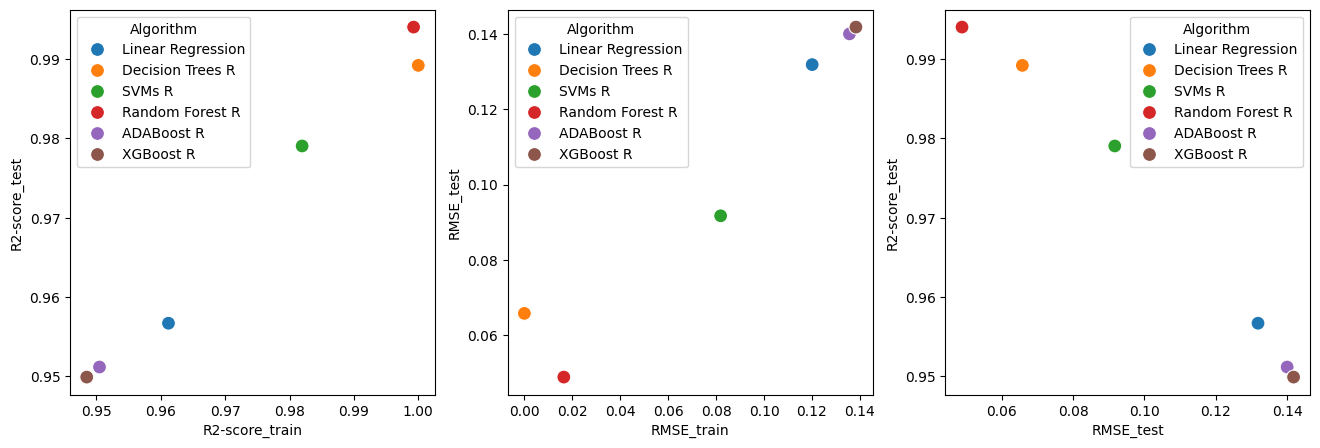

In [169]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

plt.style.use('default')
plt.rcParams['lines.markersize'] = 10
sns.scatterplot(metrics, x='R2-score_train', y='R2-score_test', hue='Algorithm', ax=axes[0] )
sns.scatterplot(metrics, x='RMSE_train', y='RMSE_test', hue='Algorithm', ax=axes[1])
sns.scatterplot(metrics, x='RMSE_test', y='R2-score_test', hue='Algorithm', ax=axes[2])

plt.show()

Text(0.5, 1.01, 'Permutation Importances Test')

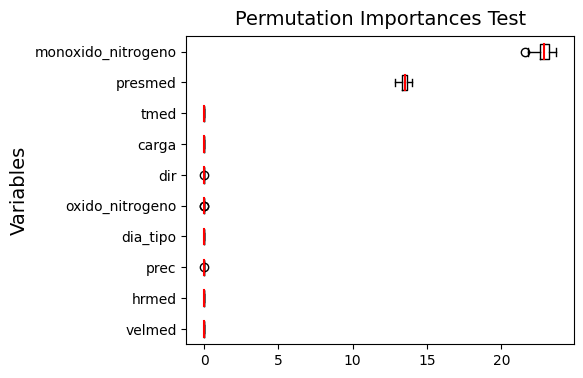

In [170]:
# Features importance
from sklearn.inspection import permutation_importance

model = lr.fit(x_train_p, y_train)

imps = permutation_importance(model, x_test_p, y_test,
                              n_repeats = 50,
                              random_state=8)

fig = plt.figure(1 , figsize = (5 , 4))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=x_test.columns[perm_sorted_idx], medianprops = dict(color ='red', linewidth = 1.5))

plt.style.use('default')
plt.ylabel('Variables', fontsize=14)
plt.title('Permutation Importances Test', fontsize=14, y=1.01)